

## <center>Houmaan chamani *--------------------* 810196443</center>

---

# <center> Signal and systems CA2 </center>

## **First question**

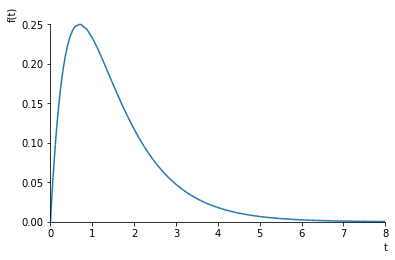

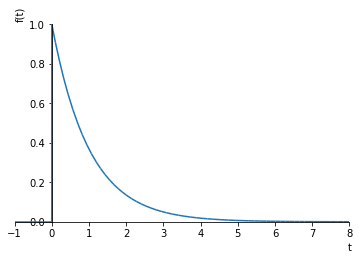

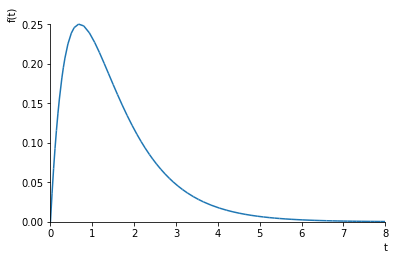

In [0]:
import sympy as sym

t = sym.symbols('t', real=True)
k = sym.Symbol('k', real=True)

u = sym.Heaviside(t)

def make_ode(x,y,defX):
  moshtagh = y.diff(t)
  ode = sym.Eq(y + moshtagh, x) ##Eq function requires two arguments, first one is made up of y and it's derivative and second one is input x.
  ode = ode.subs(x, defX)
  return ode

def find_consts(solution):
  cons = sym.solve((solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1') ##line provided by the documentation
  return cons
  
def calc(defX):
    x = sym.Function('x')(t)
    y = sym.Function('y')(t)
    ode = make_ode(x,y,defX)
    solution = sym.dsolve(ode)
    integration_consts = find_consts(solution)
    solution = solution.subs(integration_consts)
    output = solution.rhs
    return output

def calc_convolve(h):
  first_obj = sym.exp(-2*k) ##calculation of x(k)
  second_obj = h.subs(t, t-k) ##calculation of h(t-k)
  obj = first_obj * second_obj 
  y = sym.integrate(obj, (k, 0, t)) ## y is calculated using x and h in the range of '0' upto 't'
  return y


x = calc(u*sym.exp(-2*t)) ## x(t) is used to draw the function.
h = calc(sym.DiracDelta(t)) ## h(t) is used to draw the function.
y = calc_convolve(h) ## y(t) is used to draw the function.
sym.plot(x, (t, 0, 8))

sym.plot(h, (t, -1, 8))

sym.plot(y, (t, 0, 8))


## **Second question**

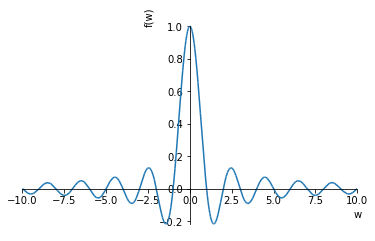

In [0]:
t = sym.symbols('t', real=True)
w = sym.symbols('w', real=True)  

class rect(sym.Function):
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)
      
X = sym.fourier_transform(rect(t),t,w)
sym.plot(X)

## **Third question**

**First part, Drawing signal:**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


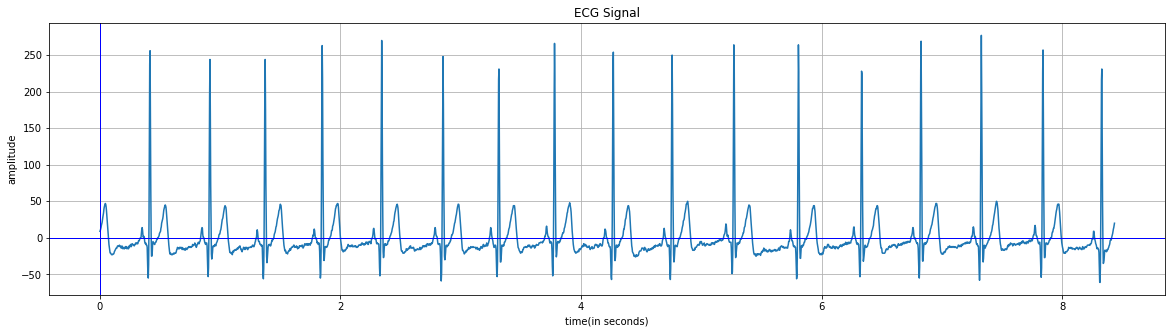

In [5]:
import numpy as np
import matplotlib.pyplot as drawer
from google.colab import drive
drive.mount('/content/drive')

def draw_plot(drawer, x_axis, y_axis, title, xlabel, ylabel):
  drawer.plot(x_axis, y_axis)
  drawer.title(title)
  drawer.xlabel(xlabel)
  drawer.ylabel(ylabel)
  drawer.axhline(linewidth=1, color='b')
  drawer.axvline(linewidth=1, color='b')

def make_normal(ecg):  ##normalizing the signal by subtracting the DC from original signal.
  dc = ecg.mean()
  return ecg - dc      ##This output is used in array making and also the amplitude of the Plot

def make_array(fq,ecg):
  x_data_range = 1 / fq
  standard_sig = make_normal(ecg)
  signal_range = standard_sig.shape[0]  ## used for determining size of required x_part values.
  return np.array([(j * x_data_range) for j in range(signal_range)])


ecg = np.genfromtxt('/content/drive/My Drive/ecg.csv', delimiter=',')

drawer.figure(figsize=(20, 5))
drawer.grid()
drawer.subplot(1, 1, 1)
draw_plot(drawer, make_array(333.334,ecg), make_normal(ecg), "ECG Signal", "time(in seconds)", "amplitude")



**Second part, Fourier transform of signal:**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


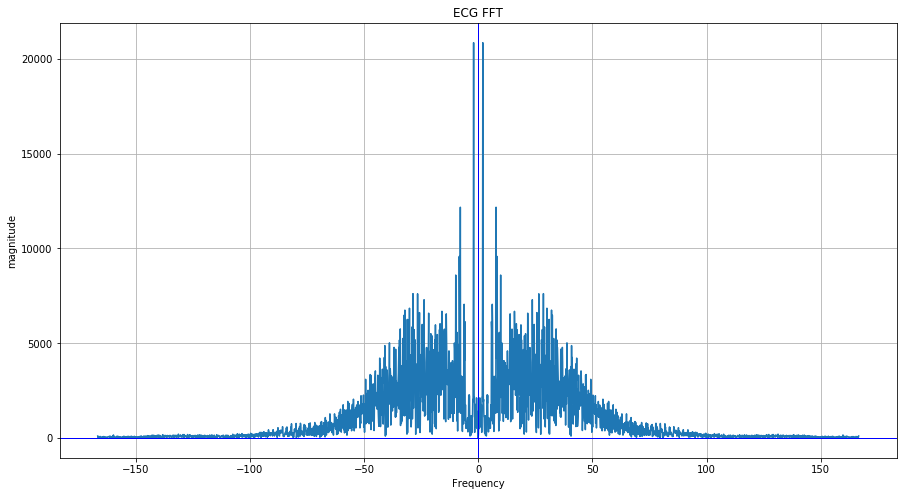

In [6]:
def abstract_fourier(ecg):
  actual_f = np.fft.fft(make_normal(ecg))
  abstract_f = np.fft.fftshift(np.absolute(actual_f))  ##Using the absolute function of numpy library, we only consider abs of each value. 
  return abstract_f

def make_freqs(ecg,fq):  ## Making The x interval of plot, Since we are ploting fourier of signal it is essential to have Symmetrical values.
  x_data_range = 1 / fq
  standard_sig = make_normal(ecg)
  signal_range = standard_sig.shape[0]
  freqs = np.fft.fftfreq(signal_range, x_data_range)
  return np.fft.fftshift(freqs)   ## Used for making the X inputs Symmetrical.


drawer.figure(figsize=(15, 8))
drawer.grid()
drawer.subplot(1, 1, 1)
draw_plot(drawer, make_freqs(ecg,333.334), abstract_fourier(ecg), "ECG FFT", "Frequency", "magnitude")

## Normal heart beat frequency is usually between 1.00 Hz to 1.67 Hz. This value may reach 2 Hz for infants.


**Third part, Brute force elimination:**

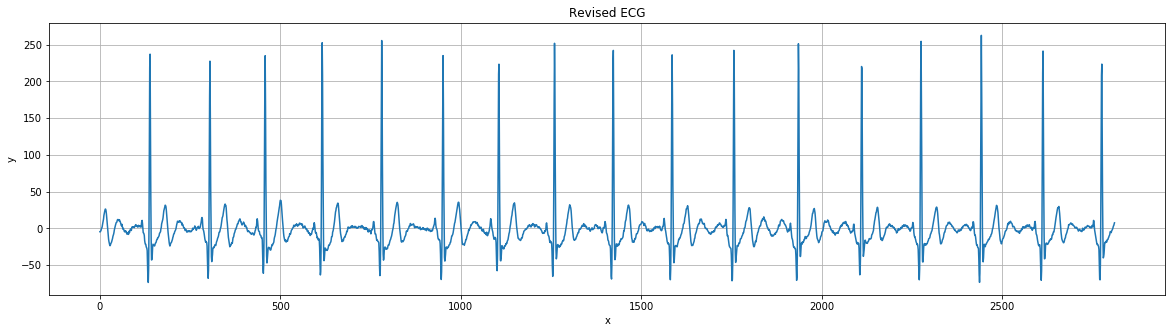

In [7]:
import matplotlib.pyplot as plt

def absolute(function):
  return np.real(function)

def special_draw(function, xlabel, ylabel, title): 
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 1, 1)
  plt.plot(absolute(function))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.show()

def actual_fourier(ecg):  ##calculating the fourier of the given ecg signal
  return np.fft.fft(make_normal(ecg))

def reverse_fourier(y_output):  ##using the ifft function of numpy, we can get the reversed result of fourier series.
  return np.fft.ifft(y_output)

def make_filters(freqs_range,freqs): ##we use the numpy library to make an array of 1's. Then we use the frequencies we got to determine
                                      ##which indexes of filter must be 0 instead of 1.
  filters = np.ones((freqs_range))
  for i in range(freqs_range):
    if(-6 < freqs[i] and freqs[i] < 6):
      filters[i] = 0
  return filters

def filterDasti(fourier_freqs, fq): ## elimination of unwanted signals
    x_data_range = 1 / fq
    freqs_range = fourier_freqs.shape[0]
    freqs = np.fft.fftfreq(freqs_range, x_data_range)  ##using the fft function of numpy, we can have the fourier.
    filters = make_filters(freqs_range,freqs)
    filtered_output = filters * fourier_freqs  ##applying the filters to our input.
    return reverse_fourier(filtered_output)
    

x = filterDasti(actual_fourier(ecg), 333.334)
special_draw(x, "x", "y", "Revised ECG")

**Third part, Butter:**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 1440x360 with 0 Axes>

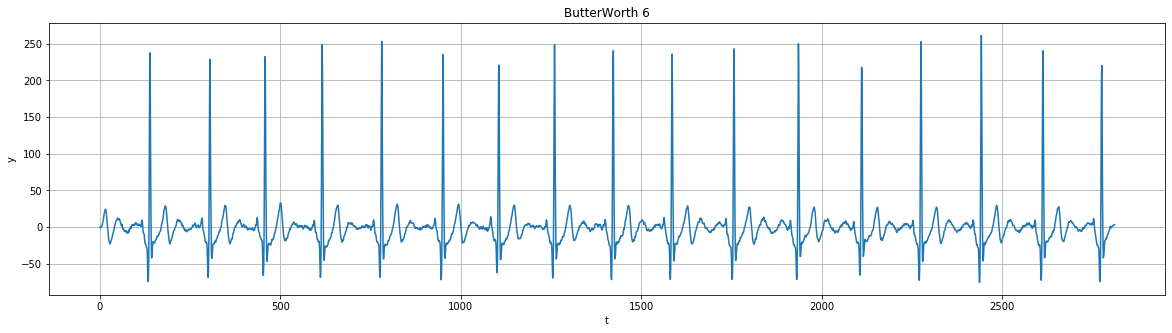

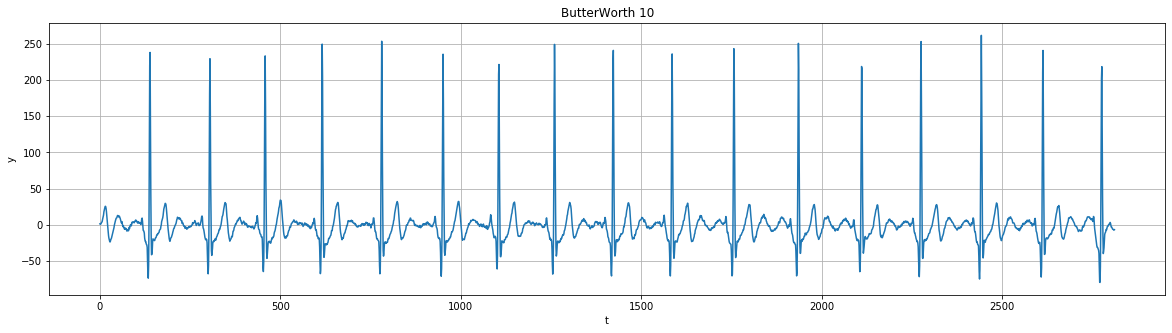

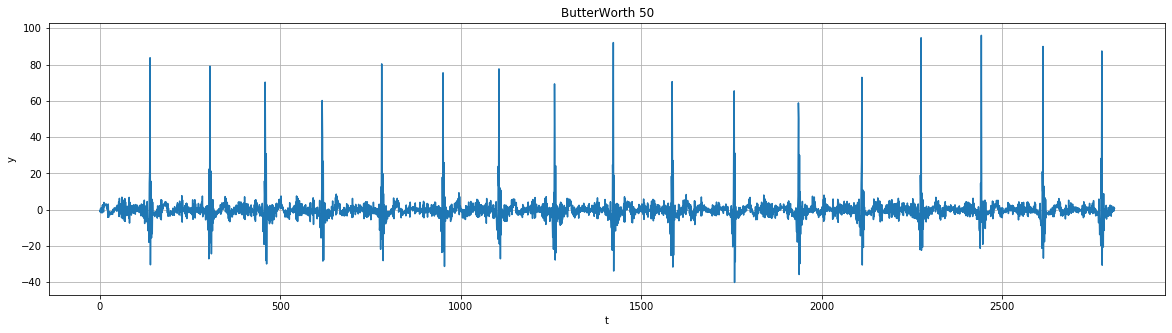

In [8]:
from scipy import signal


def super_special_draw(function, xlabel, ylabel, title): 
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 1, 1)
  plt.plot(function)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.show()

b6, a6 = signal.butter(6, Wn = [12/333.334], btype = 'highpass', output = 'ba') ##Type of output: numerator/denominator (‘ba’), Default is ‘ba’ for backwards compatibility.
b10, a10 = signal.butter(10, Wn = [12/333.334], btype = 'highpass', output = 'ba')
b50, a50 = signal.butter(50, Wn = [12/333.334], btype = 'highpass', output = 'ba', analog = True) ##analog argument is provided to support input 50
                                                                                                  ##When True, return an analog filter, otherwise a digital filter is returned.
butter6 = signal.filtfilt(b6, a6, filterDasti(actual_fourier(ecg), 333.334))  ## we use the output of last function to generate butter filter for filtfilt function
butter10 = signal.filtfilt(b10, a10, filterDasti(actual_fourier(ecg), 333.334))
butter50 = signal.filtfilt(b50, a50, filterDasti(actual_fourier(ecg), 333.334))

plt.figure(figsize=(20, 5))
super_special_draw(butter6, 't', 'y', 'ButterWorth 6')
super_special_draw(butter10, 't', 'y', 'ButterWorth 10')
super_special_draw(butter50, 't', 'y', 'ButterWorth 50')

**Third part, Covolution:**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


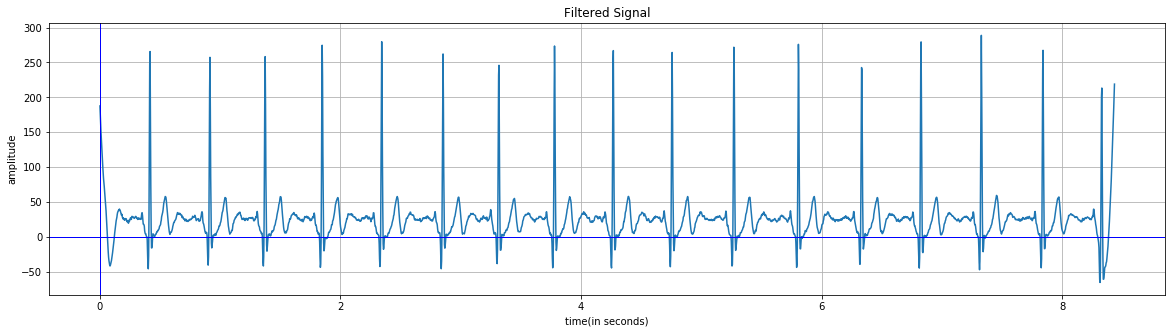

In [9]:
filter_file = np.genfromtxt('/content/drive/My Drive/filter.csv', delimiter=',')
convolution = np.convolve(ecg, filter_file, mode="same")
drawer.figure(figsize=(20, 5))
drawer.grid()
drawer.subplot(1, 1, 1)
draw_plot(drawer, make_array(333.334,ecg), convolution, "Filtered Signal", "time(in seconds)", "amplitude")

## **Fourth question**

**First part and it's files are provided in folder named 'Q4_P1'**


**Second part, Frequencies for Dial keys:**

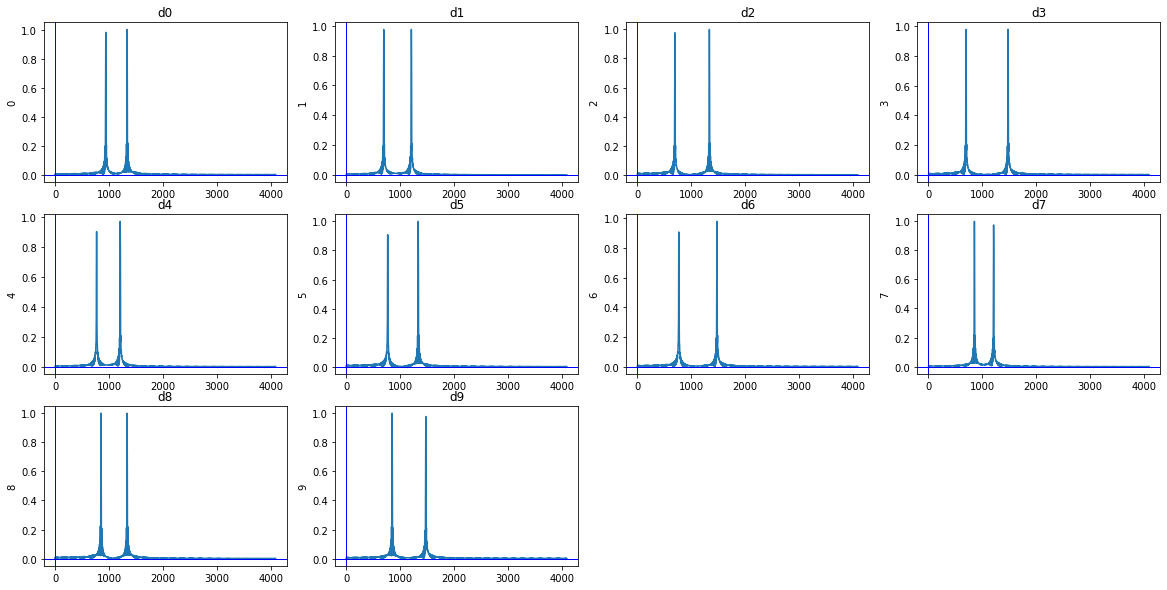

In [10]:
from numpy import fft

drawer.figure(figsize=(20, 10))
weights = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247], [0.5346, 1.1328], [0.5906, 0.9273],
           [0.5906, 1.0247], [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]
arr = np.array([i for i in range(0, 1000)])

def calc():
    co = [[] for i in range(10)]
    for i in range(10):
        co[i] = np.sin(weights[i][0]*arr) + np.sin(weights[i][1]*arr)
    return co

def generate_one_fou(index,content,number):
  return 2*np.absolute(fft.fft(content[index], n=number)) / len(content[index])

def generate_frequency(number, rate):
  return fft.fftfreq(number, d=rate)

content = calc()
for x in range(0,10):
  Row_size = generate_one_fou(x,content,2048)
  frequency = generate_frequency(2048,1/8192)
  drawer.subplot(3, 4, x+1)
  draw_plot(drawer, frequency[:1024], Row_size[:1024], 'd' + str(x), "", x)

**Third part and it's files are provided in folder named 'Q4_P3'**

**Fourth part, Frequencies for Dial keys:**

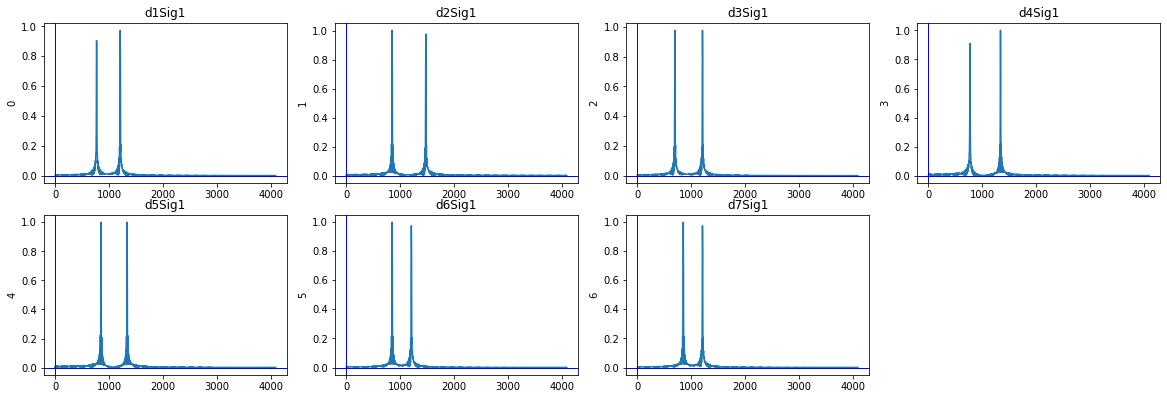

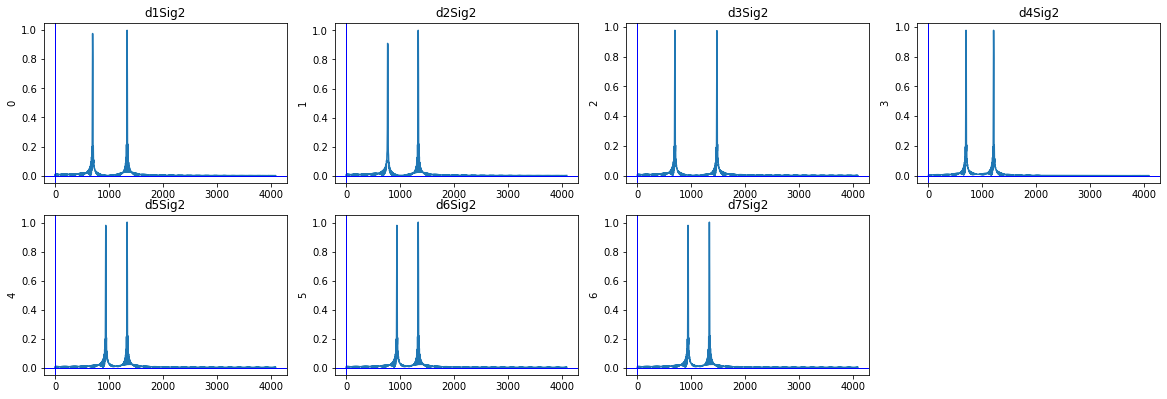

In [11]:
def special_calc(phone,p):
  num = 0
  const = 1100
  co = [[0 for i in range(1000)] for j in range(7)]  ## a 2D array used to store content of keys
  for x in range(0,7):
	  for i in range(0,1000):
		  co[x][i] = phone[p][num+i]
	  num += const ##each time we add 1100 to the  base number since 1000 samples of key and 100 samples of silence are considered.
  return co

def handle_phone(combined_phones):
  for r in range(2):
    drawer.figure(figsize=(20, 10))
    content = special_calc(combined_phones,r)
    for x in range(7):    ## From this point forward the implementation is exactly the same as the last part.
      Row_size = generate_one_fou(x,content,2048)
      frequency = generate_frequency(2048,1/8192)
      drawer.subplot(3, 4, x+1)
      draw_plot(drawer, frequency[:1024], Row_size[:1024], 'd' + str(x+1) + 'Sig' + str(r+1), "", x)
      

combined_phones = [[], []]
P1 = list(np.genfromtxt('/content/drive/My Drive/phone1.csv', delimiter=','))
P2 = list(np.genfromtxt('/content/drive/My Drive/phone2.csv', delimiter=','))
combined_phones[0] = P1
combined_phones[1] = P2
handle_phone(combined_phones)

**Fifth part, Frequencies for Dial keys, Automated:**

In [12]:
def print_arr(arr):
  for i in range(len(arr)):
    print(arr[i], end = "")
  print()

def check_circumstance(a,b):
  return (np.allclose(a,b,atol=1))  ##returns true if the two arrays are equal within the given tolerance

def find_number(content):
  out = []
  for i in range(7):
    for j in range(10):
      if(check_circumstance(content[i],co[j])):
        out.append(j) ##the first number that meets the requirements is considered as dialed key.
        break
  return out

co = calc()
for i in range(2):
  content = special_calc(combined_phones,i)
  print(str(i+1) + "'st number is:")
  print_arr(find_number(content))

1'st number is:
4915877
2'st number is:
2531000


**Bonus part:**

In [20]:
import math
import numpy as np

def check_super_circumstance(a,b):
  return(np.allclose(a[0:100],b[1:101],atol=1) or np.allclose(a[0:100],b[0:100],atol=1)) ##returns true if the two arrays are equal within the given tolerance

def find_super_number(content):
  out = []
  for i in range(7):
    for j in range(10):
      if(check_super_circumstance(content[i],co[j])):
        out.append(j) ##the first number that meets the requirements is considered as dialed key.
        break
  return out

def bonus_calc(combined_hard_phones,i):
  h_list = combined_hard_phones[i]
  co = []
  s = 0
  c = 0
  for i in range(0,100):  ## we add 100 zero's to the end of each hard_phone list.
    h_list.append(0)
  h_list.append(1)  ##after adding 100 zero's we add 1 one as the last element of arrays.
  base = -1  
  prev = 0
  for x in range(7):
	  for i in range(7000):
		  base += 1
		  if math.isclose(float(h_list[base]),0.):
			  if c == 0:
				  s = base
			  c = c + 1
		  else:
			  if c >= 100:
				  if s > 0:
					  co.append([float(x) for x in h_list[prev:s-1]])
					  c = 0
					  prev = base
					  break
				  else:
					  c = 0
					  prev = base
			  c = 0
  return co


combined_hard_phones = [[], []]
P1 = list(np.genfromtxt('/content/drive/My Drive/hard_phone1.csv', delimiter=','))
P2 = list(np.genfromtxt('/content/drive/My Drive/hard_phone2.csv', delimiter=','))
combined_hard_phones[0] = P1
combined_hard_phones[1] = P2

for i in range(2):
  content = bonus_calc(combined_hard_phones,i)
  print(str(i+1) + "'st number is:")
  print_arr(find_super_number(content))

1'st number is:
4915877
2'st number is:
2531000
